# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [154]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [155]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [156]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
        MSE = 1 / y.size * np.sum(((np.array(np.sum(X * w,axis=1))) - y) ** 2)
        return MSE
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        
        grad = np.sum(2 / y.size * X.T * (((np.sum(X * w,axis=1))) - y), axis=1)
        return grad

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [157]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [158]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    
    trace = np.zeros((n_iterations + 1, w_init.size))
    trace[0] = w_init
    w = w_init
    
    for i in range(n_iterations):
        grad = loss.calc_grad(X, y, w)
        w = w - lr * grad
        trace[i + 1] = w
    
    return trace

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [159]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [160]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.5891768045026
0.8670644395649493


In [161]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    plt.xlim(w_list[:, 0].min() - 0.1, 
             w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1,
             w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

Размер шага = 0.01


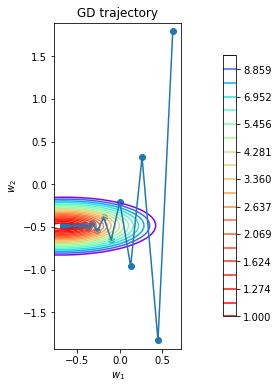

Размер шага = 0.005


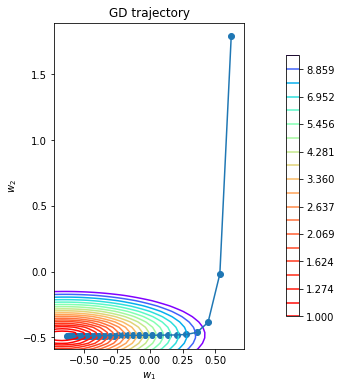

Размер шага = 0.001


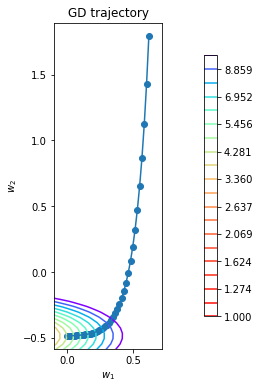

Размер шага = 0.0005


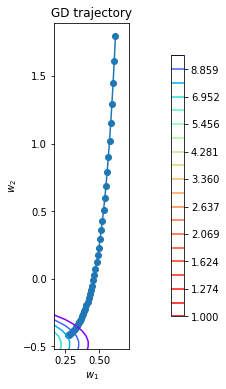

In [9]:
for lr in [0.01, 0.005, 0.001, 0.0005]:
    trace = gradient_descent(w_init, X, y, loss, lr, num_steps)
    print("Размер шага =", lr)
    plot_gd(trace, X, y, loss)

### Выводы о том, как параметр lr влияет на поведение градиентного спуска:

Параметр lr – величина шага, на который нужно домножать градиент. Он обуславливает скорость движения спуска. При очень маленькой длине шага, градиентрный спуск будет очень медленный. Например, как показано на последнем графике, при lr = 0.0005, даже за большое число итераций, спуск не дойдет до минимума. В случае с большой длиной шага, есть опасность при спуске проскочить минимум из-за скачкообразной траектории (можем наблюдать ее на первом графике при lr = 0.01). На основе приведенных графиков, lr = 0.005 кажется мне оптимальным: спуск доходит до минимума, при этом траектория движения достаточно равномерна.

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [162]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    
    trace = np.zeros((n_iterations + 1, w_init.size))
    trace[0] = w_init
    w = w_init
    
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        y_batch = y[batch_indices]
        grad = loss.calc_grad(batch, y_batch, w)
        w = w - lr * grad
        trace[i + 1] = w
    
    return trace

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

Размер шага = 0.01 Размер подвыборки 4


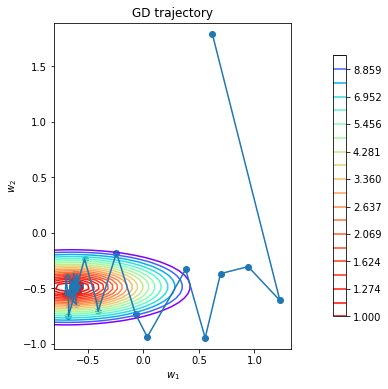

Размер шага = 0.01 Размер подвыборки 15


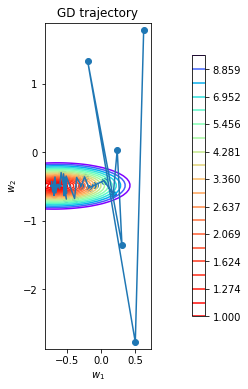

Размер шага = 0.01 Размер подвыборки 60


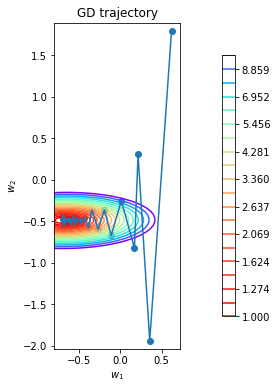

Размер шага = 0.01 Размер подвыборки 200


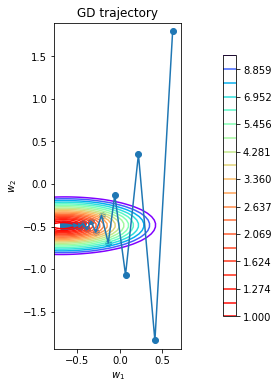

Размер шага = 0.005 Размер подвыборки 4


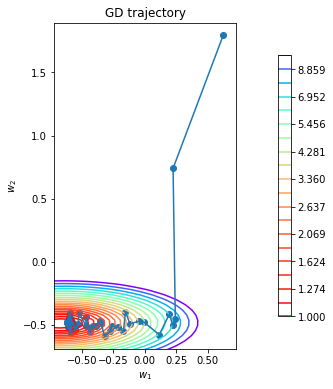

Размер шага = 0.005 Размер подвыборки 15


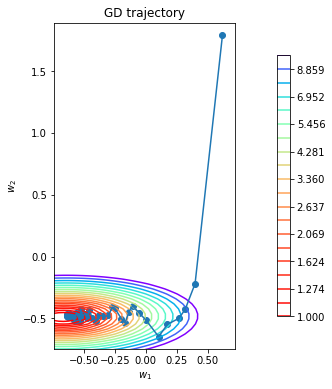

Размер шага = 0.005 Размер подвыборки 60


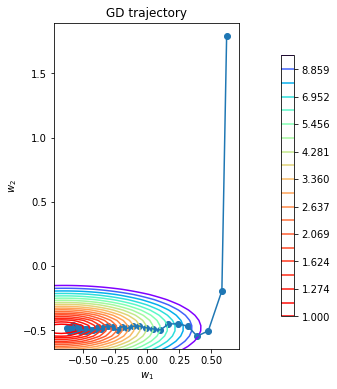

Размер шага = 0.005 Размер подвыборки 200


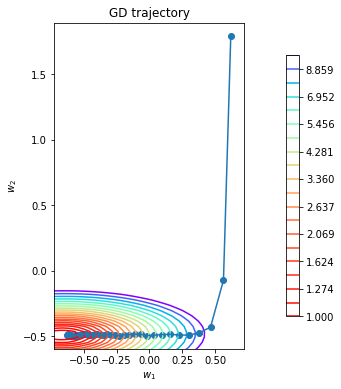

Размер шага = 0.001 Размер подвыборки 4


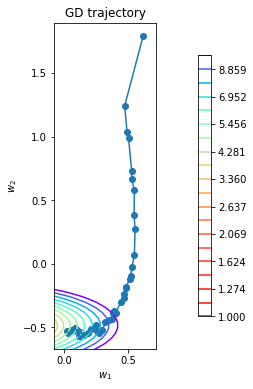

Размер шага = 0.001 Размер подвыборки 15


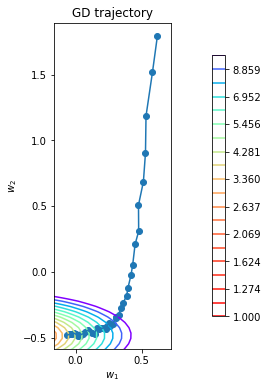

Размер шага = 0.001 Размер подвыборки 60


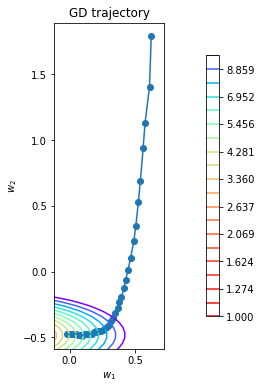

Размер шага = 0.001 Размер подвыборки 200


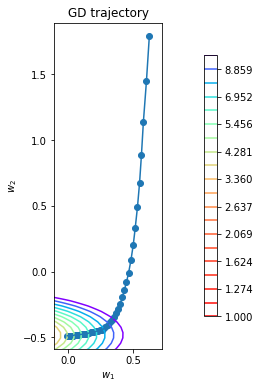

Размер шага = 0.0005 Размер подвыборки 4


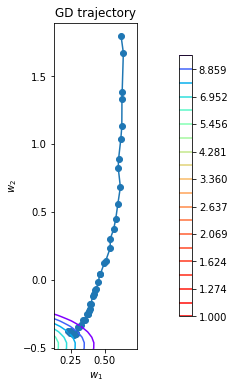

Размер шага = 0.0005 Размер подвыборки 15


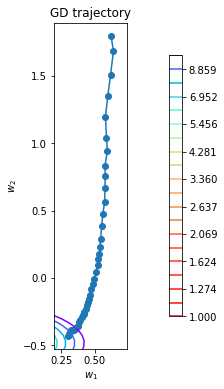

Размер шага = 0.0005 Размер подвыборки 60


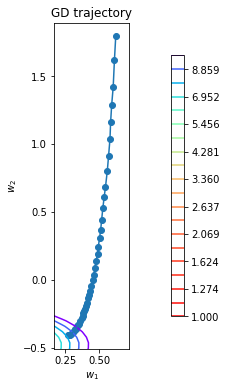

Размер шага = 0.0005 Размер подвыборки 200


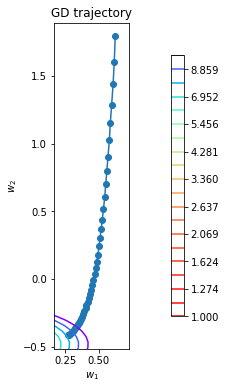

In [11]:
# -- YOUR CODE HERE --

for lr in [0.01, 0.005, 0.001, 0.0005]:
    for batch_size in [4, 15, 60, 200]:
        trace = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, num_steps)
        print("Размер шага =", lr, "Размер подвыборки", batch_size)
        plot_gd(trace, X, y, loss)

### Выводы о том, как параметры  lr и batch_size влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

При увеличении значения параметра batch_size, отвечающего за размер подвыборки, мы наблюдаем увеличение схожести стохастического градиентного спуска и обычного. При уменьшении этого параметра, траектория движения спуска становится очень хаотичной (из-за того что не учитываем большую часть объектов). 
Влияние параметра lr для стохастического градиентного спуска во многом аналогично влиянию для обычного градиентного спуска. Стоит, однако, добавить, что уменьшение значений параметра lr для стохастического градиентного спуска оказывает стабилизирующее действие на траекторию спуска. Несмотря на все еще досточно хаотичный характер спуска, уменьшение шагов приводит к стабилизации направления спуска. 
На основе полученных графиков, параметры lr = 0.005 и batch_size = 60 кажутся мне оптимальными, спуск доходит до минимума, при этом траектория движения достаточно равномерна (в условиях уменьшения размера подвыборки). 

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [166]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    
    trace = np.zeros((n_iterations + 1, w_init.size))
    trace[0] = w_init
    w = w_init
    
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        y_batch = y[batch_indices]
        grad = loss.calc_grad(batch, y_batch, w)
        
        lr = lr * ((1 / (1 + i)) ** p)
        w = w - lr * grad
        trace[i + 1] = w
    
    return trace

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

Значение параметра p: 0.1


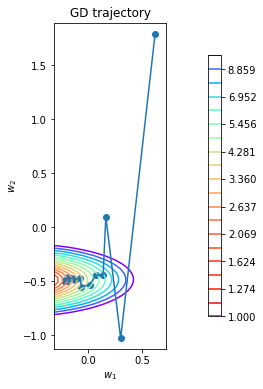

Значение параметра p: 0.15


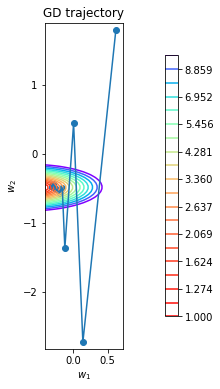

Значение параметра p: 0.3


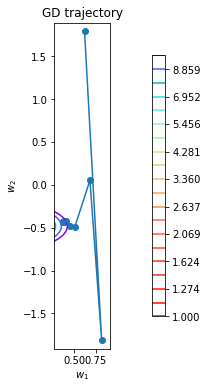

Значение параметра p: 0.6


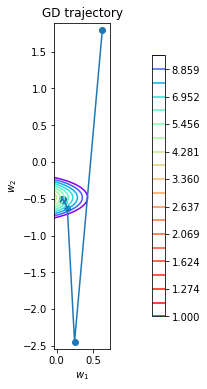

In [167]:
# -- YOUR CODE HERE --

for p in [0.1, 0.15, 0.3, 0.6]:
        trace = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p, num_steps)
        print("Значение параметра p:", p)
        plot_gd(trace, X, y, loss)

### Выводы о том, как параметр p влияет на поведение стохастического градиентного спуска:

Параметр р влияет на размер шага на конкретной итерации. При увеличении этого параметра, значение шага становится более зависимым от номера итерации: увеличение р проиводит к уменьшению шага на итерации (> 1) по сравнению с обычным стохастическим градиентным спуском. Соответственно, увеличение параметра р приводит к уменьшению скорости (увеличение необходимого числа шагов) спуска, но увеличивает точность движения при приближении к минимуму, что позволяет не проскочить его. 

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

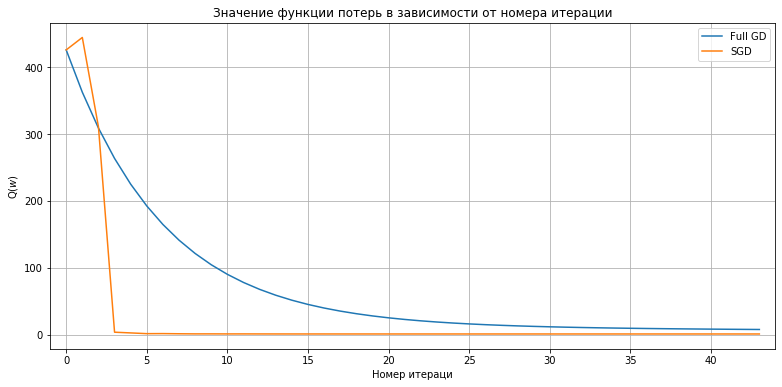

In [168]:
w_list1 = gradient_descent(w_init, X, y, loss, lr, num_steps)
w_list2 = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.1)
value1 = []
value2 = []
for i in range(num_steps + 1):
    value1.append(loss.calc_loss(X, y, w_list1[i]))
    value2.append(loss.calc_loss(X, y, w_list2[i]))

plt.figure(figsize=(13, 6))
plt.plot(range(num_steps+1), value1, label='Full GD')
plt.plot(range(num_steps+1), value2, label='SGD')

plt.title('Значение функции потерь в зависимости от номера итерации')
plt.xlim((-1, num_steps+1))
plt.legend()
plt.xlabel('Номер итераци')
plt.ylabel(r'Q($w$)')
plt.grid()
plt.show()

## Выводы: 

На данном графике видно приемущество SGD. В нашем конкретном случае, скачкообразное движение SGD не помешало нахождению минимума, и скорость (необходимое число итераций) схождения значение функции потерь к минимуму оказалась больше для SGD. Однако, это не является главным преимуществом SGD. Главным является увеличении скорости выполнения спуска (уменьшение сложности алгоритма). Это можно оценить только сравнив непосредственное время выполнения обоих спусков, и это не может быть оценено с помощью данного графика. 

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [169]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        # -- YOUR CODE HERE --
        w_init = np.random.uniform(-2, 2, (X.shape[1]))
        self.w = gradient_descent(w_init, X, y, self.loss, self.lr)[-1]
        
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE --
        y_pred = (np.sum(X * self.w, axis=1))
        
        return y_pred

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [170]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [177]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"]
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [178]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)
X_raw

index  0      1            2       3      4     5            6    7  \
0        0  3    NaN  alfa-romero     gas    std   two  convertible  rwd   
1        1  3    NaN  alfa-romero     gas    std   two  convertible  rwd   
2        2  1    NaN  alfa-romero     gas    std   two    hatchback  rwd   
3        3  2  164.0         audi     gas    std  four        sedan  fwd   
4        4  2  164.0         audi     gas    std  four        sedan  4wd   
..     ... ..    ...          ...     ...    ...   ...          ...  ...   
196    200 -1   95.0        volvo     gas    std  four        sedan  rwd   
197    201 -1   95.0        volvo     gas  turbo  four        sedan  rwd   
198    202 -1   95.0        volvo     gas    std  four        sedan  rwd   
199    203 -1   95.0        volvo  diesel  turbo  four        sedan  rwd   
200    204 -1   95.0        volvo     gas  turbo  four        sedan  rwd   

         8  ...    15   16    17    18    19    20     21      22  23  24  
0    front  ...  four  130  mpfi  3.47  2.68   9.0  111.0  5000.0  21  27  
1    front  ...  four  130  mpfi  3.47  2.68   9.0  111.0  5000.0  21  27  
2    front  ...   six  152  mpfi  2.68  3.47   9.0  154.0  5000.0  19  26  
3    front  ...  four  109  mpfi  3.19  3.40  10.0  102.0  5500.0  24  30  
4    front  ...  five  136  mpfi  3.19  3.40   8.0  115.0  5500.0  18  22  
..     ...  ...   ...  ...   ...   ...   ...   ...    ...     ...  ..  ..  
196  front  ...  four  141  mpfi  3.78  3.15   9.5  114.0  5400.0  23  28  
197  front  ...  four  141  mpfi  3.78  3.15   8.7  160.0  5300.0  19  25  
198  front  ...   six  173  mpfi  3.58  2.87   8.8  134.0  5500.0  18  23  
199  front  ...   six  145   idi  3.01  3.40  23.0  106.0  4800.0  26  27  
200  front  ...  four  141  mpfi  3.78  3.15   9.5  114.0  5400.0  19  25  

[201 rows x 26 columns]

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [179]:
X_raw = X_raw.drop("index", axis=1)

# Строка "index" не несла в себе информации. Еще при загрузке датасета была произведена переиндексация;
# посчитав старые индексы ненужными, я их удалила. 

## Работа с пропусками

In [180]:
from sklearn.impute import SimpleImputer

In [181]:
# -- YOUR CODE HERE --
if X_raw.isnull().any().any():
    print(X_raw.isnull().sum())

0      0
1     37
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     4
19     4
20     0
21     2
22     2
23     0
24     0
dtype: int64


In [182]:
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 25 columns):
0     201 non-null int64
1     164 non-null float64
2     201 non-null object
3     201 non-null object
4     201 non-null object
5     199 non-null object
6     201 non-null object
7     201 non-null object
8     201 non-null object
9     201 non-null float64
10    201 non-null float64
11    201 non-null float64
12    201 non-null float64
13    201 non-null int64
14    201 non-null object
15    201 non-null object
16    201 non-null int64
17    201 non-null object
18    197 non-null float64
19    197 non-null float64
20    201 non-null float64
21    199 non-null float64
22    199 non-null float64
23    201 non-null int64
24    201 non-null int64
dtypes: float64(10), int64(5), object(10)
memory usage: 39.4+ KB


In [183]:
cat_features_mask = (X_raw.dtypes == "object").values
# для вещественнозначных признаков заполним пропуски средними
X_real = X_raw[X_raw.columns[~cat_features_mask]]
mis_replacer = SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_real), columns=X_real.columns)
# для категориальных - пустыми строками
X_cat = X_raw[X_raw.columns[cat_features_mask]].fillna("")
X_no_mis = pd.concat([X_no_mis_real, X_cat], axis=1)
X_no_mis

0      1      9      10    11    12      13     16    18    19  ...  \
0    3.0  122.0   88.6  168.8  64.1  48.8  2548.0  130.0  3.47  2.68  ...   
1    3.0  122.0   88.6  168.8  64.1  48.8  2548.0  130.0  3.47  2.68  ...   
2    1.0  122.0   94.5  171.2  65.5  52.4  2823.0  152.0  2.68  3.47  ...   
3    2.0  164.0   99.8  176.6  66.2  54.3  2337.0  109.0  3.19  3.40  ...   
4    2.0  164.0   99.4  176.6  66.4  54.3  2824.0  136.0  3.19  3.40  ...   
..   ...    ...    ...    ...   ...   ...     ...    ...   ...   ...  ...   
196 -1.0   95.0  109.1  188.8  68.9  55.5  2952.0  141.0  3.78  3.15  ...   
197 -1.0   95.0  109.1  188.8  68.8  55.5  3049.0  141.0  3.78  3.15  ...   
198 -1.0   95.0  109.1  188.8  68.9  55.5  3012.0  173.0  3.58  2.87  ...   
199 -1.0   95.0  109.1  188.8  68.9  55.5  3217.0  145.0  3.01  3.40  ...   
200 -1.0   95.0  109.1  188.8  68.9  55.5  3062.0  141.0  3.78  3.15  ...   

              2       3      4     5            6    7      8     14    15  \
0    alfa-romero     gas    std   two  convertible  rwd  front  dohc  four   
1    alfa-romero     gas    std   two  convertible  rwd  front  dohc  four   
2    alfa-romero     gas    std   two    hatchback  rwd  front  ohcv   six   
3           audi     gas    std  four        sedan  fwd  front   ohc  four   
4           audi     gas    std  four        sedan  4wd  front   ohc  five   
..           ...     ...    ...   ...          ...  ...    ...   ...   ...   
196        volvo     gas    std  four        sedan  rwd  front   ohc  four   
197        volvo     gas  turbo  four        sedan  rwd  front   ohc  four   
198        volvo     gas    std  four        sedan  rwd  front  ohcv   six   
199        volvo  diesel  turbo  four        sedan  rwd  front   ohc   six   
200        volvo     gas  turbo  four        sedan  rwd  front   ohc  four   

       17  
0    mpfi  
1    mpfi  
2    mpfi  
3    mpfi  
4    mpfi  
..    ...  
196  mpfi  
197  mpfi  
198  mpfi  
199   idi  
200  mpfi  

[201 rows x 25 columns]

## Кодировка категориальных переменных

In [184]:
X_dum = pd.get_dummies(X_no_mis, drop_first=True)
print(X_dum.shape)
X_dum.head()

(201, 65)


0      1     9     10    11    12      13     16    18    19  ...  \
0  3.0  122.0  88.6  168.8  64.1  48.8  2548.0  130.0  3.47  2.68  ...   
1  3.0  122.0  88.6  168.8  64.1  48.8  2548.0  130.0  3.47  2.68  ...   
2  1.0  122.0  94.5  171.2  65.5  52.4  2823.0  152.0  2.68  3.47  ...   
3  2.0  164.0  99.8  176.6  66.2  54.3  2337.0  109.0  3.19  3.40  ...   
4  2.0  164.0  99.4  176.6  66.4  54.3  2824.0  136.0  3.19  3.40  ...   

   15_three  15_twelve  15_two  17_2bbl  17_4bbl  17_idi  17_mfi  17_mpfi  \
0         0          0       0        0        0       0       0        1   
1         0          0       0        0        0       0       0        1   
2         0          0       0        0        0       0       0        1   
3         0          0       0        0        0       0       0        1   
4         0          0       0        0        0       0       0        1   

   17_spdi  17_spfi  
0        0        0  
1        0        0  
2        0        0  
3        0        0  
4        0        0  

[5 rows x 65 columns]

In [185]:
X_dum.describe()

0          1           9          10          11          12  \
count  201.000000  201.00000  201.000000  201.000000  201.000000  201.000000   
mean     0.840796  122.00000   98.797015  174.200995   65.889055   53.766667   
std      1.254802   31.99625    6.066366   12.322175    2.101471    2.447822   
min     -2.000000   65.00000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000  101.00000   94.500000  166.800000   64.100000   52.000000   
50%      1.000000  122.00000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  137.00000  102.400000  183.500000   66.600000   55.500000   
max      3.000000  256.00000  120.900000  208.100000   72.000000   59.800000   

                13          16          18          19  ...    15_three  \
count   201.000000  201.000000  201.000000  201.000000  ...  201.000000   
mean   2555.666667  126.875622    3.330711    3.256904  ...    0.004975   
std     517.296727   41.546834    0.268072    0.316048  ...    0.070535   
min    1488.000000   61.000000    2.540000    2.070000  ...    0.000000   
25%    2169.000000   98.000000    3.150000    3.110000  ...    0.000000   
50%    2414.000000  120.000000    3.310000    3.290000  ...    0.000000   
75%    2926.000000  141.000000    3.580000    3.410000  ...    0.000000   
max    4066.000000  326.000000    3.940000    4.170000  ...    1.000000   

        15_twelve      15_two     17_2bbl     17_4bbl      17_idi      17_mfi  \
count  201.000000  201.000000  201.000000  201.000000  201.000000  201.000000   
mean     0.004975    0.019900    0.318408    0.014925    0.099502    0.004975   
std      0.070535    0.140007    0.467022    0.121557    0.300083    0.070535   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

          17_mpfi     17_spdi     17_spfi  
count  201.000000  201.000000  201.000000  
mean     0.457711    0.044776    0.004975  
std      0.499452    0.207328    0.070535  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      1.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 65 columns]

## Разделение датасета на выборки 

In [186]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_dum, y, test_size=0.3, random_state=np.random.seed())

## Нормализация числовых признаков

In [187]:
from sklearn.preprocessing import MinMaxScaler

In [188]:
normalizer = MinMaxScaler()
X_real_norm_np = normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)
X_train_norm = pd.DataFrame(data=X_train_norm)
X_test_norm = pd.DataFrame(data=X_test_norm)
X_train_norm

0         1         2         3         4         5         6   \
0    0.6  0.536145  0.244828  0.426016  0.307018  0.250000  0.194337   
1    0.4  0.301205  0.420690  0.596748  0.543860  0.641667  0.363460   
2    0.6  0.234940  0.224138  0.292683  0.342105  0.525000  0.161753   
3    0.4  0.246988  0.365517  0.525203  0.429825  0.575000  0.324282   
4    0.4  0.343373  0.475862  0.635772  0.578947  0.608333  0.455004   
..   ...       ...       ...       ...       ...       ...       ...   
135  0.8  0.343373  0.327586  0.580488  0.552632  0.225000  0.377036   
136  0.6  0.234940  0.224138  0.292683  0.342105  0.525000  0.155935   
137  0.8  0.234940  0.431034  0.739837  0.543860  0.691667  0.527153   
138  0.4  0.156627  0.313793  0.409756  0.359649  0.416667  0.245927   
139  1.0  0.777108  0.162069  0.481301  0.666667  0.158333  0.614042   

           7         8         9   ...   55   56   57   58   59   60   61  \
0    0.109434  0.307143  0.552381  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
1    0.230189  0.607143  0.628571  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2    0.113208  0.350000  0.514286  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
3    0.222642  0.564286  0.666667  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
4    0.283019  0.464286  0.633333  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
..        ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
135  0.267925  0.657143  0.871429  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
136  0.113208  0.350000  0.514286  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
137  0.226415  0.714286  0.476190  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
138  0.139623  0.464286  0.457143  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
139  0.452830  0.635714  0.571429  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      62   63   64  
0    0.0  0.0  0.0  
1    0.0  0.0  0.0  
2    0.0  0.0  0.0  
3    0.0  0.0  0.0  
4    1.0  0.0  0.0  
..   ...  ...  ...  
135  1.0  0.0  0.0  
136  0.0  0.0  0.0  
137  1.0  0.0  0.0  
138  0.0  0.0  0.0  
139  1.0  0.0  0.0  

[140 rows x 65 columns]

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [198]:
# -- YOUR CODE HERE --

linear_regression.fit(X_train_norm, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [199]:
from sklearn.metrics import mean_squared_error

print ("Train: {}".format(mean_squared_error(y_train, linear_regression.predict(X_train_norm))))
print ("Test:  {}".format(mean_squared_error(y_test, linear_regression.predict(X_test_norm))))

Train: 7776372.880681539
Test:  27353782.751587447


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [191]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
        MSE = 1 / y.size * np.sum(((np.array(np.sum(X * w,axis=1))) - y) ** 2) + self.coef * np.sum(np.sum(w[:-1]) ** 2)
        return MSE
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        
        w_mod = w
        w_mod[-1] = 0
        grad = np.sum(2 / y.size * X.T * (((np.sum(X * w,axis=1))) - y), axis=1) + 2 * self.coef * w_mod
        return grad

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [192]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [193]:
# -- YOUR CODE HERE --

linear_regression.fit(X_train_norm, y_train)
print ("Train: {}".format(mean_squared_error(y_train, linear_regression.predict(X_train_norm))))
print ("Test:  {}".format(mean_squared_error(y_test, linear_regression.predict(X_test_norm))))

Train: 7776372.880681535
Test:  27353782.75158744


In [195]:
lr1 = LinearRegression(MSEL2Loss(0.001))
lr1.fit(X_train_norm, y_train)
print ("Train: {}".format(mean_squared_error(y_train, lr1.predict(X_train_norm))))
print ("Test:  {}".format(mean_squared_error(y_test, lr1.predict(X_test_norm))))

Train: 1487095.7249053516
Test:  8797829.567138344


Хороший коэфициент регуляризации – 0.001, при нем результаты на тестовой выборке лучше.

In [201]:
print("Результат на обучающей и тестовой выборке без регуляризации")
print("Train: 7776372.880681539")
print("Test:  27353782.751587447")

Результат на обучающей и тестовой выборке без регуляризации
Train: 7776372.880681539
Test:  27353782.751587447


По сравнению с результатом работы модели без регуляризации, ошибка на тестовой выборке уменьшилась более чем в два раза.

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [202]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        
        z = np.sum(np.sum(X * w, axis=1) - y)
        if (- self.eps < z) and (self.eps > z):
            return 1 / y.size * np.sum(1/2 * (z ** 2))
        else:
            return 1 / y.size * np.sum(self.eps * (np.abs(z) - 1/2 * self.eps))
        
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        
        
        z = np.sum(np.sum(X * w, axis=1) - y)
        if (- self.eps < z) and (self.eps > z):
            df = z
        else:
            df = self.eps * np.sign(z)
        grad = 1 / y.size * np.sum(X * df)
        
        return grad

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [207]:
# -- YOUR CODE HERE --
lr1 = LinearRegression(HuberLoss(1))
lr1.fit(X_train_norm, y_train)
print ("Train: {}".format(mean_squared_error(y_train, lr1.predict(X_train_norm))))
print ("Test:  {}".format(mean_squared_error(y_test, lr1.predict(X_test_norm))))

Train: 41052428.63190993
Test:  83408342.18150845


Изменение ошибки на тестовой и тренировочном выборке для HuberLoss значительно меньше аналогичного изменения для MSELoss.

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

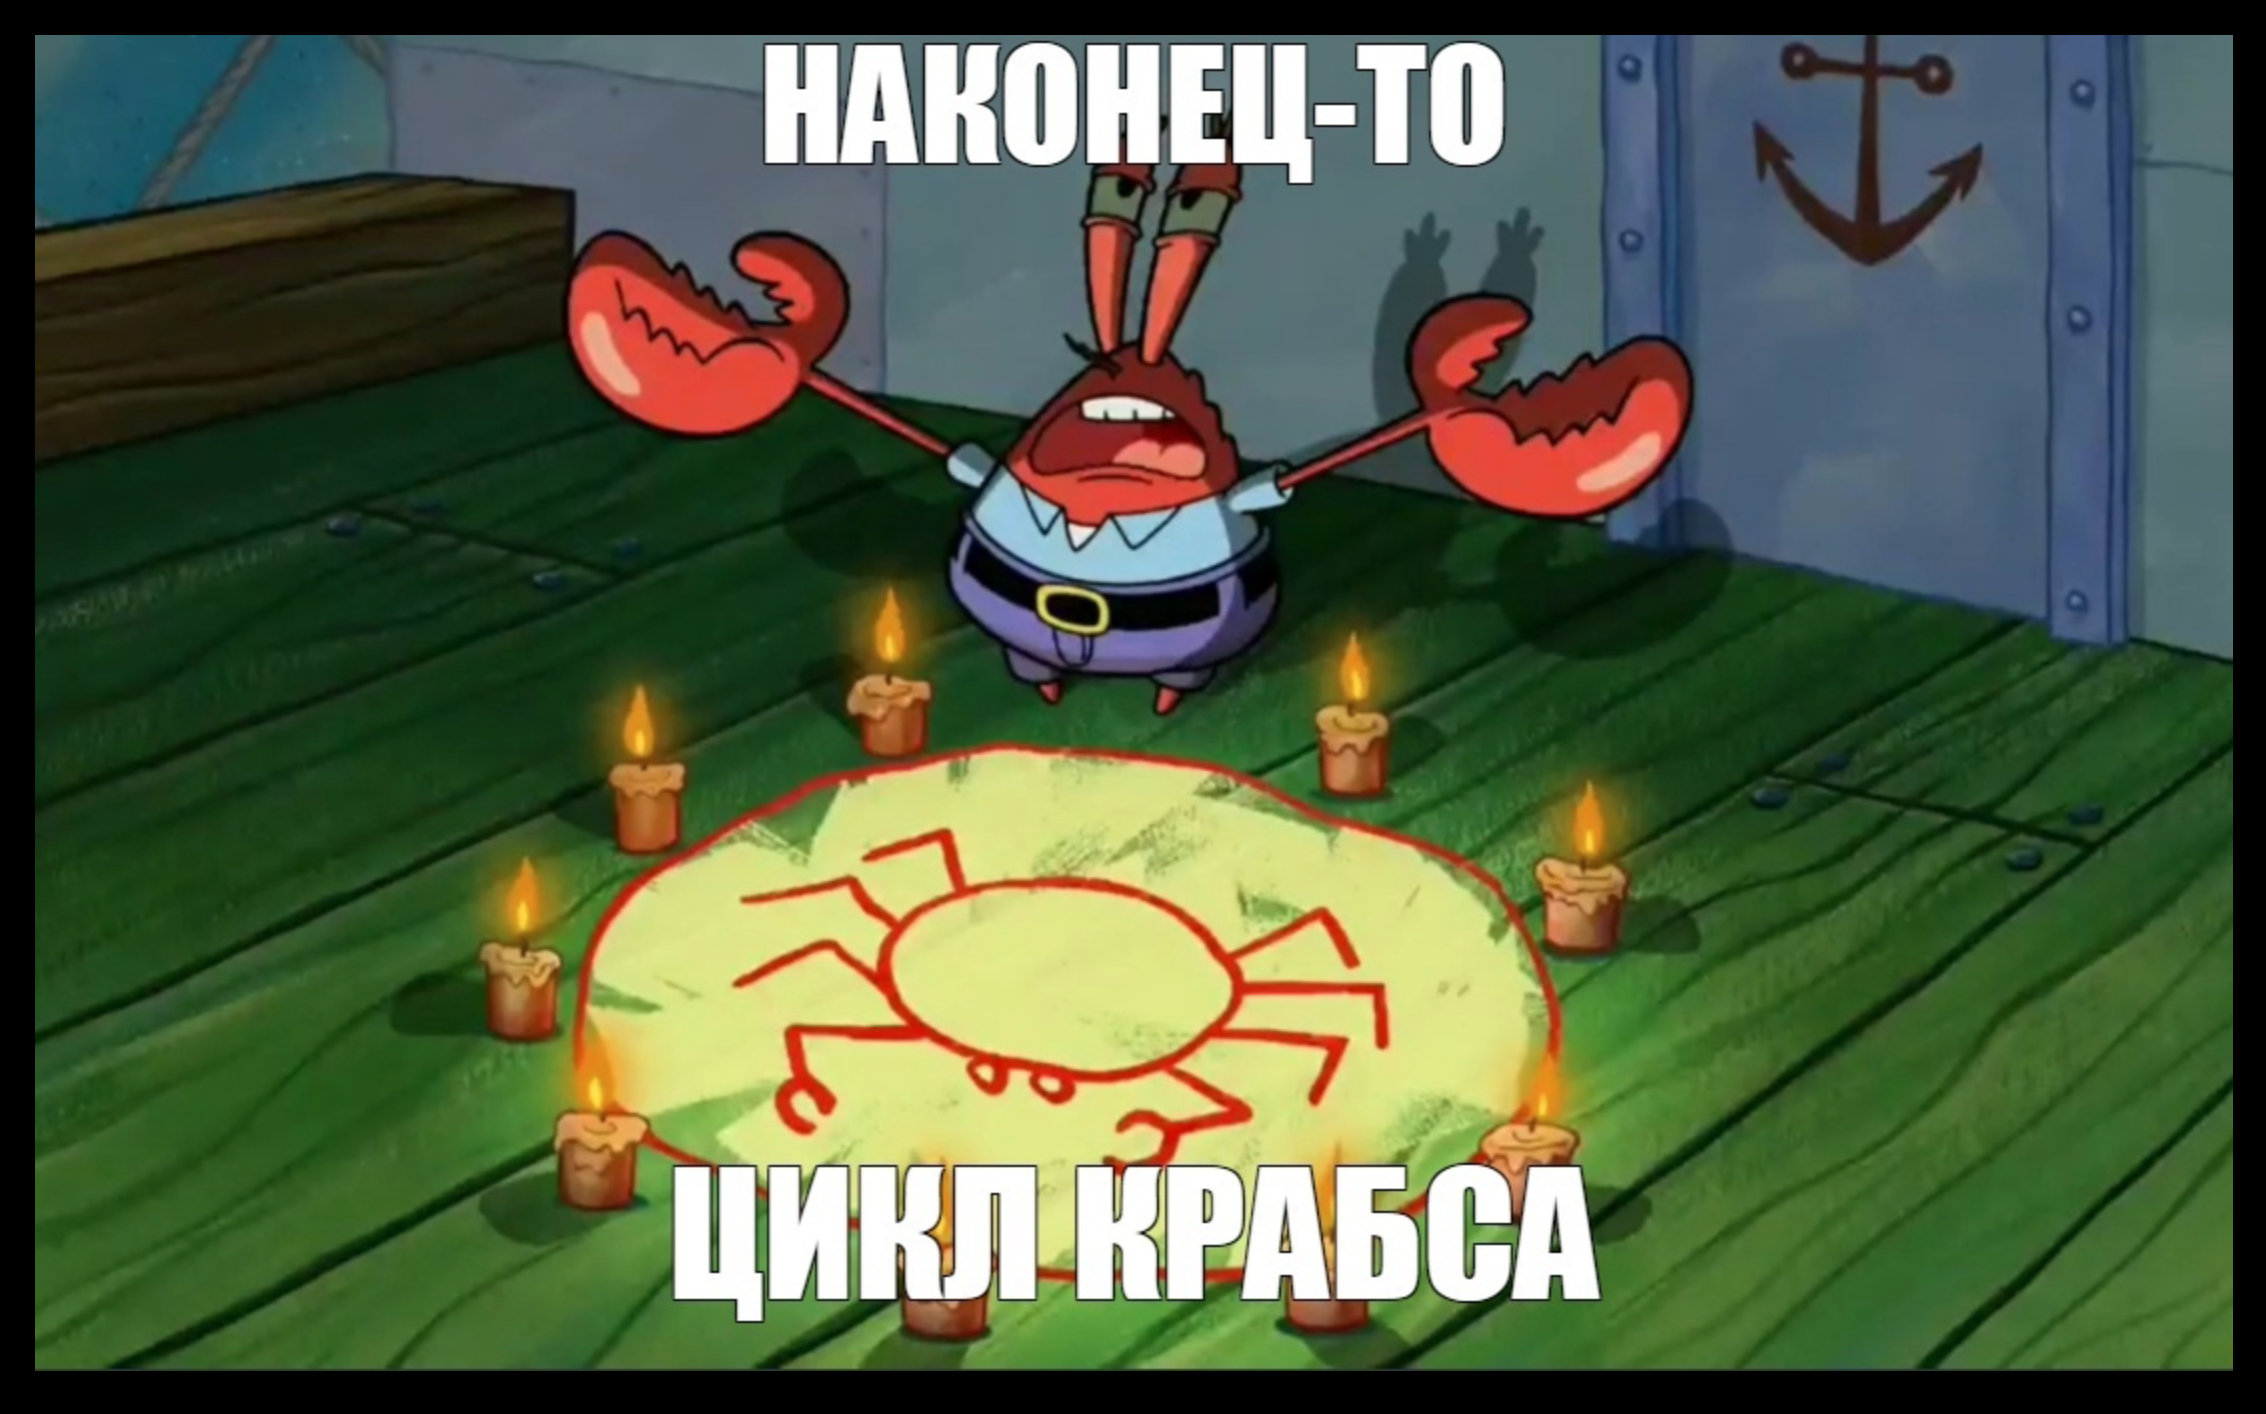

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [ ]:
# -- YOUR CODE HERE --